In [1]:
import traceback,logging,os,signal,time,gzip,StringIO,logging.handlers,re,sys,requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

config = dict()
config['resource_dir'] = "../resources/"
config['raw_file'] = config['resource_dir'] + "ideal_weight.csv"

ideal_weight_df = pd.read_csv(config['raw_file'])
ideal_weight_df.columns = [x.replace("\'","") for x in ideal_weight_df.columns.values.tolist()]

ideal_weight_df.loc[:,'sex'] = ideal_weight_df['sex'].map(lambda x: x.replace("\'",""))
ideal_weight_df

,id,sex,actual,ideal,diff
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10
5,5,Male,155,170,-15
6,6,Male,155,155,0
7,7,Female,114,110,4
8,8,Female,135,135,0
9,9,Male,180,171,9


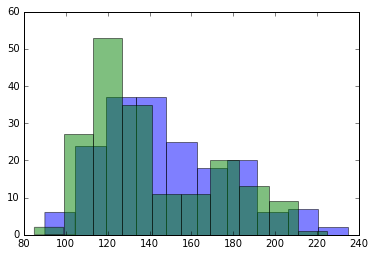

In [2]:
#ideal_weight_df[['actual','ideal']].hist()

plt.hist(ideal_weight_df['actual'], alpha=0.5, label='actual')
plt.hist(ideal_weight_df['ideal'], alpha=0.5, label='ideal')
plt.show()

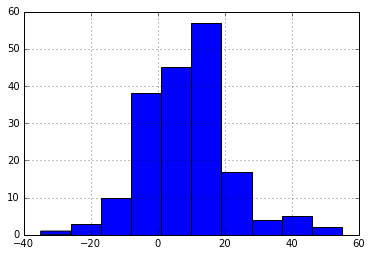

In [3]:
ideal_weight_df['diff'].hist()

In [4]:
ideal_weight_df['sex_id'] = ideal_weight_df['sex'].map(lambda x: 1 if x == 'Male' else 0)


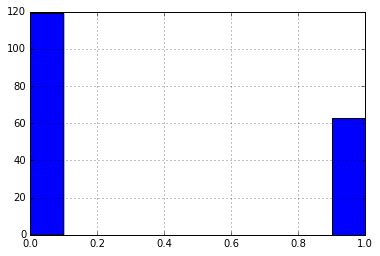

In [5]:
ideal_weight_df['sex_id'].hist()

In [10]:
clf = GaussianNB()
clf.fit(ideal_weight_df[['actual','ideal','diff']],ideal_weight_df['sex'])

GaussianNB()

In [11]:
print clf.predict([[145,160,-15]])

['Male']


In [12]:
print clf.predict([[160,145,15]])

['Female']
